<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Implementing_Stepwise_Regression_in_Healthcare_Data_Analysis_A_Practical_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stepwise Selection Results:
Step 1: Features selected [0], Cross-validated MSE = 3.8145
Step 2: Features selected [0, 1], Cross-validated MSE = 1.3364
Step 3: Features selected [0, 1, 2], Cross-validated MSE = 1.0611
Step 4: Features selected [0, 1, 2, 6], Cross-validated MSE = 1.0549
Step 5: Features selected [0, 1, 2, 6, 4], Cross-validated MSE = 1.0581
Step 6: Features selected [0, 1, 2, 6, 4, 3], Cross-validated MSE = 1.0633
Step 7: Features selected [0, 1, 2, 6, 4, 3, 8], Cross-validated MSE = 1.0729
Step 8: Features selected [0, 1, 2, 6, 4, 3, 8, 7], Cross-validated MSE = 1.1039
Step 9: Features selected [0, 1, 2, 6, 4, 3, 8, 7, 5], Cross-validated MSE = 1.1424
Step 10: Features selected [0, 1, 2, 6, 4, 3, 8, 7, 5, 9], Cross-validated MSE = 1.2065
Final selected features: [0, 1, 2, 6, 4, 3, 8, 7, 5, 9]
Test MSE on final model: 1.0113


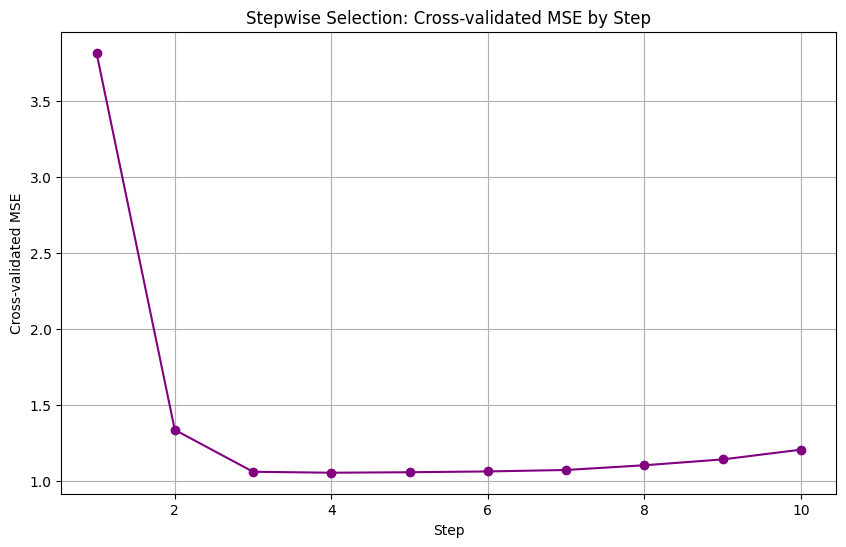


Summary of Stepwise Selection:
 Step              Selected Features  Cross-validated MSE
    1                            [0]             3.814461
    2                         [0, 1]             1.336419
    3                      [0, 1, 2]             1.061137
    4                   [0, 1, 2, 6]             1.054876
    5                [0, 1, 2, 6, 4]             1.058111
    6             [0, 1, 2, 6, 4, 3]             1.063329
    7          [0, 1, 2, 6, 4, 3, 8]             1.072886
    8       [0, 1, 2, 6, 4, 3, 8, 7]             1.103934
    9    [0, 1, 2, 6, 4, 3, 8, 7, 5]             1.142369
   10 [0, 1, 2, 6, 4, 3, 8, 7, 5, 9]             1.206543


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from itertools import combinations

# Generate synthetic healthcare dataset with predictors and response variable.
np.random.seed(42)
n_samples = 100  # Number of patients
n_features = 10  # Number of clinical predictors
X = np.random.normal(0, 1, size=(n_samples, n_features))
beta = np.array([2, -1.5, 0.5, 0, 0, 0, 0, 0, 0, 0])  # True coefficients
noise = np.random.normal(0, 1, size=n_samples)
Y = X @ beta + noise  # Response variable with noise

# Split the data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Forward Stepwise Selection implementation.
def forward_stepwise_selection(X, Y):
    n_features = X.shape[1]
    selected_features = []
    remaining_features = list(range(n_features))
    best_model_per_step = []

    while remaining_features:
        best_score = float('inf')
        best_feature = None

        # Test each remaining feature by adding it to the model.
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[:, current_features]
            model = LinearRegression()
            scores = -cross_val_score(model, X_subset, Y, cv=5, scoring='neg_mean_squared_error')
            mean_score = scores.mean()

            # Select the feature that minimizes the mean squared error.
            if mean_score < best_score:
                best_score = mean_score
                best_feature = feature

        # Update selected and remaining features.
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_model_per_step.append((list(selected_features), best_score))
        else:
            break

    return best_model_per_step

# Perform forward stepwise selection on training data.
stepwise_results = forward_stepwise_selection(X_train, Y_train)

# Evaluate the final model on the test data.
best_features = stepwise_results[-1][0]
X_train_selected = X_train[:, best_features]
X_test_selected = X_test[:, best_features]
final_model = LinearRegression()
final_model.fit(X_train_selected, Y_train)
Y_pred = final_model.predict(X_test_selected)

# Compute test Mean Squared Error (MSE).
test_mse = np.mean((Y_test - Y_pred) ** 2)

# Display the results of the stepwise procedure.
results_table = []
print("Stepwise Selection Results:")
for step, (features, mse) in enumerate(stepwise_results, 1):
    print(f"Step {step}: Features selected {features}, Cross-validated MSE = {mse:.4f}")
    results_table.append([step, features, mse])

print(f"Final selected features: {best_features}")
print(f"Test MSE on final model: {test_mse:.4f}")

# Create a DataFrame for visualization.
results_df = pd.DataFrame(results_table, columns=["Step", "Selected Features", "Cross-validated MSE"])

# Plot the progression of Cross-validated MSE.
steps = results_df["Step"]
mse_values = results_df["Cross-validated MSE"]
plt.figure(figsize=(10, 6))
plt.plot(steps, mse_values, marker='o', linestyle='-', color='purple')
plt.title("Stepwise Selection: Cross-validated MSE by Step")
plt.xlabel("Step")
plt.ylabel("Cross-validated MSE")
plt.grid(True)
plt.show()

# Display the results table.
print("\nSummary of Stepwise Selection:")
print(results_df.to_string(index=False))
